In [1]:
import base64
import numpy as np
import pandas as pd
import os

# Plotly imports
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from PIL import Image
from nltk.stem import LancasterStemmer

# Other imports
from collections import Counter
import requests
import re
from nltk.corpus import stopwords
import string
import nltk
import imageio
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt

from sklearn.feature_extraction import DictVectorizer

import requests
from PIL import Image
from io import BytesIO 

In [4]:
train = pd.read_csv('../../dataset/train_eng.csv')
train.head()

,Datetime,Tweet Id,Text,CleanTweet,language
0,2021-05-30 22:55:02+00:00,1399137302547415045,"""reducing the ecological footprint is not only...",ecological footprint high mix new tools old ho...,en
1,2021-05-30 20:04:04+00:00,1399094276739547141,@BrookingsInst @EswarSPrasad I hope you addres...,hope address massive ecological footprint need,en
2,2021-05-30 18:41:21+00:00,1399073460865929218,+This technology is first presented as a solut...,technology first presented solution impending ...,en
3,2021-05-30 18:06:00+00:00,1399064564780744720,Proof of Work vs. Proof of Stake: the Ecologic...,proof work proof ecological footprint tq tezos,en
4,2021-05-30 00:11:46+00:00,1398794224460435458,The @EdmYouthCouncil Environmental Awareness W...,environmental awareness webinar already great ...,en


In [5]:
train = train.drop(['Tweet Id', 'language', 'Datetime', 'Text'], axis =1)
train

,CleanTweet
0,ecological footprint high mix new tools old ho...
1,hope address massive ecological footprint need
2,technology first presented solution impending ...
3,proof work proof ecological footprint tq tezos
4,environmental awareness webinar already great ...
...,...
2664,like concept reduce ecological wish could add ...
2665,need reduce ecological type project integrates...
2666,found ecological footprint footprint carbon fo...
2667,calculated ecological many planets take find


In [6]:
train.shape

(2669, 1)

In [7]:
train.columns

Index(['CleanTweet'], dtype='object')

In [8]:
vectorizer = CountVectorizer(max_features = 2500,max_df = 0.20)

In [9]:
tf = vectorizer.fit_transform(train['CleanTweet'])

In [10]:
tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
tf

<2669x2500 sparse matrix of type '<class 'numpy.int64'>'
	with 26624 stored elements in Compressed Sparse Row format>

# NEGATIVE TWEETS

## Topic modelling: Latent Dirichlet Allocation

### Step 1. Instantiate the model

In [12]:
lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method = 'online', #mini-batch of training data to 
                                #update the ``components_``variable incrementally. 
                                learning_offset = 50.,#parameter that downweights early 
                                #iterations in online learning.
                                random_state = 42)

In [13]:
lda

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=42)

In [12]:
lda_model = lda.fit(tf)

### Step 2. Fit the model with the TF vectors calculated above 

In [13]:
lda_model.components_[0]

array([0.21688435, 2.23790348, 0.20924754, ..., 2.0045979 , 0.24997745,
       1.80567946])

In [14]:
lda_model

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=42)

In [15]:
lda_model.get_params()

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 50.0,
 'max_doc_update_iter': 100,
 'max_iter': 5,
 'mean_change_tol': 0.001,
 'n_components': 5,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 42,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

### Step 3. Visualize and analyse the results 

In [16]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [17]:
n_top_words = 10
print("\nTopics in LDA model: ")
tf_feature_names = vectorizer.get_feature_names()

#tf_feature_names
print_top_words(lda_model, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:human population small less know smaller high biocapacity global still

Topic #1:reducing much earth use even day like less times local

Topic #2:carbon reduce also going lower green go people homeowners environmental

Topic #3:many take need reduce would energy find like one see

Topic #4:reduce help sustainable way could make join development consume changing


In [18]:
first_topic = lda_model.components_[0]
second_topic = lda_model.components_[1]
third_topic = lda_model.components_[2]
fourth_topic = lda_model.components_[3]

In [19]:
tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
first_topic.shape

(2500,)

In [21]:
first_topic.argsort()

array([1776, 1626, 1002, ..., 2066, 1692, 1093], dtype=int64)

In [22]:
tf_feature_names

['ability',
 'able',
 'absolutely',
 'absorb',
 'absurd',
 'academic',
 'accelerate',
 'accelerating',
 'accept',
 'access',
 'accessible',
 'according',
 'account',
 'accountability',
 'accountable',
 'accounting',
 'accounts',
 'achieve',
 'achieves',
 'achieving',
 'acres',
 'across',
 'act',
 'action',
 'actions',
 'actively',
 'activities',
 'activity',
 'actual',
 'actually',
 'adapt',
 'adaptation',
 'add',
 'added',
 'adding',
 'addition',
 'address',
 'addressed',
 'addressing',
 'adjustments',
 'adopt',
 'adopting',
 'advocate',
 'affect',
 'affluent',
 'afford',
 'affordable',
 'africa',
 'african',
 'age',
 'agglomeration',
 'ago',
 'agree',
 'agricultural',
 'agriculture',
 'ahead',
 'aim',
 'aiming',
 'aims',
 'air',
 'aircraft',
 'aka',
 'al',
 'align',
 'alignment',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altered',
 'alternative',
 'alternatives',
 'although',
 'always',
 'amazing',
 'amazon',
 'ambik',
 'ameri

In [23]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
#argsort() sorts in descending way->x[startAt:endBefore:skip]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

In [24]:
first_topic_words

['human',
 'population',
 'small',
 'less',
 'know',
 'smaller',
 'high',
 'biocapacity',
 'global',
 'still',
 'social',
 'capacity',
 'solar',
 'national',
 'last',
 'living',
 'new',
 'reducing',
 'means',
 'report',
 'one',
 'energy',
 'accounts',
 'good',
 'leave',
 'sustainable',
 'person',
 'look',
 'old',
 'average',
 'food',
 'first',
 'live',
 'big',
 'enough',
 'products',
 'country',
 'read',
 'also',
 'total',
 'latest',
 'produced',
 'reduces',
 'mean',
 'growth',
 'per',
 'lowest',
 'learn',
 'needs',
 'diet']

In [25]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

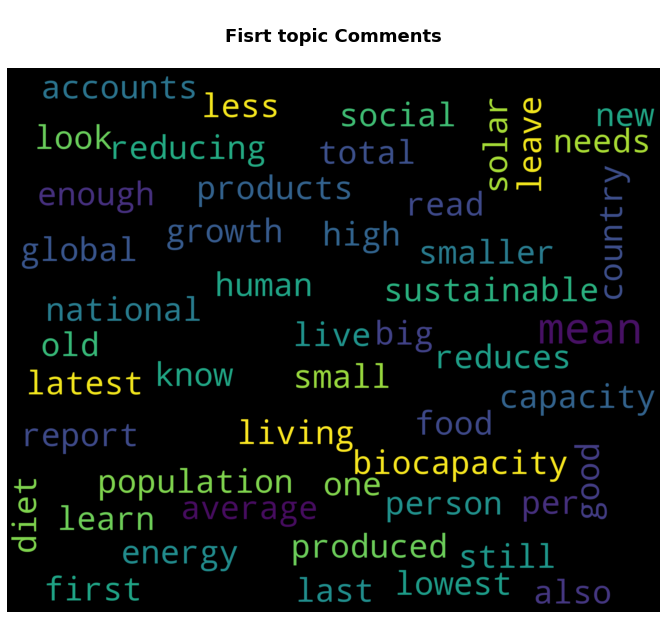

In [26]:
wordcloud = WordCloud(max_font_size=200, max_words=350, background_color="black",
                      width= 3000, height = 2500,
                      stopwords = stopwords.words('english')).generate(" ".join(first_topic_words))

plot_wordcloud(wordcloud, '\nFisrt topic')

In [27]:
first_ = np.array(Image.open(requests.get('https://cdn.pixabay.com/photo/2014/04/02/17/08/globe-308065_1280.png', stream=True).raw))
first_

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=uint8)

TypeError: Invalid shape (1263, 1280, 2) for image data

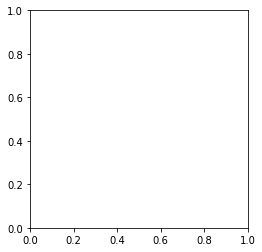

In [28]:
plt.imshow(first_)

(-0.5, 1279.5, 1262.5, -0.5)

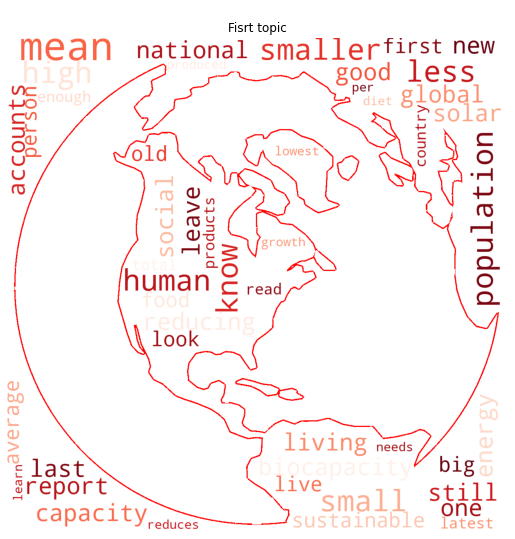

In [58]:
plt.figure(figsize=(20,20))
# The wordcloud of the raven for Edgar Allen Poe
plt.subplot(211)
wc = WordCloud(background_color="white", 
               max_words=350, 
               mask=first_, 
               stopwords=STOPWORDS, collocations= False, 
               max_font_size= 100, contour_width=1, contour_color='red')

wc.generate(" ".join(first_topic_words))
plt.title(' \nFisrt topic')
plt.imshow(wc.recolor( colormap= 'Reds' , random_state=17))
plt.axis('off')

In [57]:
wc.to_file('wc.png')

(-0.5, 1279.5, 1262.5, -0.5)

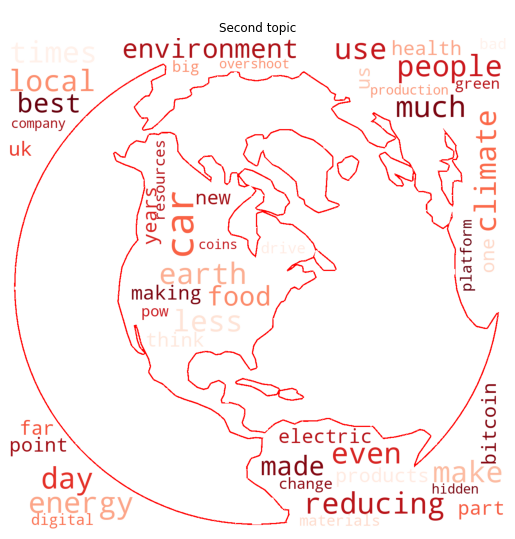

In [59]:
plt.figure(figsize=(20,20))
# The wordcloud of the raven for Edgar Allen Poe
plt.subplot(211)
wc1 = WordCloud(background_color="white", 
               max_words=350, 
               mask=first_, 
               stopwords=STOPWORDS, collocations= False, 
               max_font_size= 100, contour_width=1, contour_color='red')

wc1.generate(" ".join(second_topic_words))
plt.title(' \nSecond topic')
plt.imshow(wc1.recolor( colormap= 'Reds' , random_state=17))
plt.axis('off')

In [60]:
wc1.to_file('wc1.png')

(-0.5, 1279.5, 1262.5, -0.5)

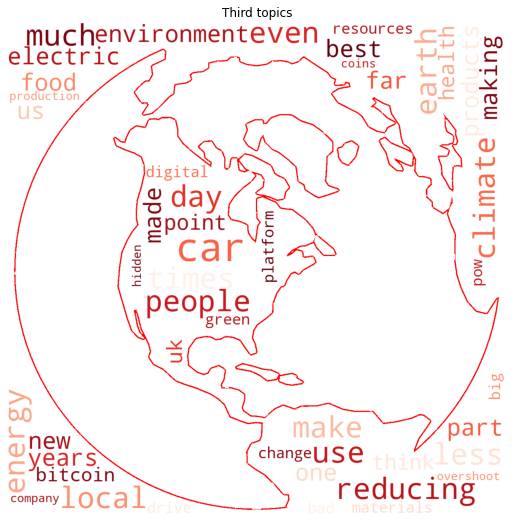

In [54]:
plt.figure(figsize=(20,20))
# The wordcloud of the raven for Edgar Allen Poe
plt.subplot(211)
wc2 = WordCloud(background_color="white", 
               max_words=300, 
               mask=first_, 
               stopwords=STOPWORDS, collocations= False, 
               max_font_size= 100, contour_width=1, contour_color='red')

wc2.generate(" ".join(third_topic_words))
plt.title("Third topics")
plt.imshow(wc.recolor( colormap= 'Reds' , random_state=17))
plt.axis('off')

In [55]:
wc2.to_file('wc2.png')

# POSITIVE TWEETS 

In [62]:
data = pd.read_csv('../dataset/NFA.train_pos.csv')
data.head()

,Text,CleanTweet,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,The goal of Upcycle Green Technology #autorepa...,goal upcycle green technology help drive safel...,en,0.0,0.444,0.556,0.8750
1,ðµ Healthy environment for healthy skin ð...,healthy environment healthy skin meet rahel fo...,en,0.0,0.579,0.421,0.9022
2,Great to see the launch of this service! As we...,great see launch return use rail country begin...,en,0.0,0.532,0.468,0.9062
3,@sgtesco 1) I like $DOGE because it leaves les...,like leaves less ecological footprint also lik...,en,0.0,0.564,0.436,0.9077
4,"@wintonARK Yeah sure I get all that, so far it...",yeah sure get far looks like pos works great t...,en,0.0,0.575,0.425,0.8779


In [63]:
data = data.drop(['language', 'Text'], axis =1)
data

,CleanTweet,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,goal upcycle green technology help drive safel...,0.000,0.444,0.556,0.8750
1,healthy environment healthy skin meet rahel fo...,0.000,0.579,0.421,0.9022
2,great see launch return use rail country begin...,0.000,0.532,0.468,0.9062
3,like leaves less ecological footprint also lik...,0.000,0.564,0.436,0.9077
4,yeah sure get far looks like pos works great t...,0.000,0.575,0.425,0.8779
...,...,...,...,...,...
110,u know paris agreement super vague states part...,0.049,0.455,0.497,0.9300
111,look amazing ecological footprint pledges crea...,0.000,0.421,0.579,0.8750
112,sharing genyk corporate facebook commitment en...,0.000,0.495,0.505,0.8807
113,positive ecological footprint project sustaina...,0.000,0.644,0.356,0.8591


In [64]:
vectorizer2 = CountVectorizer(max_features = 2500,max_df = 0.20)

In [65]:
tf2 = vectorizer2.fit_transform(data['CleanTweet'])

In [66]:
tf2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
lda2 = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method = 'online', #mini-batch of training data to 
                                #update the ``components_``variable incrementally. 
                                learning_offset = 50.,#parameter that downweights early 
                                #iterations in online learning.
                                random_state = 42)

In [68]:
lda2

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=42)

In [69]:
lda_model2 = lda2.fit(tf2)

In [70]:
lda_model2.components_[0]

array([0.81480403, 0.76821242, 0.76137092, ..., 0.7005423 , 1.02994929,
       0.72511037])

In [71]:
lda_model2

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=42)

In [72]:
first_topic2 = lda_model2.components_[0]
second_topic2 = lda_model2.components_[1]
third_topic2 = lda_model2.components_[2]
fourth_topic2 = lda_model2.components_[3]
fourth_topic2 = lda_model2.components_[4]

In [73]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [74]:
n_top_words = 10
print("\nTopics in LDA model: ")
tf2_feature_names = vectorizer2.get_feature_names()

#tf_feature_names
print_top_words(lda_model2, tf2_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:help best good one happy way working adopt earth people

Topic #1:great like love resources join new happy committed support want

Topic #2:love reducing like help energy happy use work aka greater

Topic #3:help great health like taking green earth use day part

Topic #4:carbon solution positive good using still super great new one


In [75]:
tf2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [76]:
first_topic2.shape

(1024,)

In [77]:
first_topic2.argsort()

array([158, 911, 376, ..., 403,  93, 448], dtype=int64)

In [78]:
tf2_feature_names

['able',
 'abolish',
 'abundant',
 'accelerate',
 'accept',
 'accepting',
 'access',
 'account',
 'accounting',
 'accurately',
 'act',
 'actions',
 'actively',
 'actually',
 'added',
 'address',
 'addressing',
 'adjustments',
 'admirable',
 'admittedly',
 'adopt',
 'advancement',
 'advantages',
 'afk',
 'agreement',
 'agriculture',
 'aka',
 'akin',
 'align',
 'alignment',
 'allow',
 'allowing',
 'almost',
 'along',
 'already',
 'also',
 'alsoâ',
 'alternative',
 'although',
 'altogether',
 'always',
 'amazing',
 'among',
 'animals',
 'another',
 'anyone',
 'anyway',
 'app',
 'apparel',
 'applications',
 'appreciate',
 'appreciated',
 'approach',
 'april',
 'arable',
 'areas',
 'around',
 'art',
 'article',
 'asian',
 'asked',
 'asking',
 'associated',
 'astounding',
 'attract',
 'autonomy',
 'aviation',
 'award',
 'awarded',
 'aware',
 'awareness',
 'awesome',
 'ayoub',
 'baby',
 'bag',
 'bags',
 'based',
 'basic',
 'batteries',
 'beat',
 'beautiful',
 'becoming',
 'beef',
 'began',
 '

In [79]:
first_topic2_words = [tf2_feature_names[i] for i in first_topic2.argsort()[:-50 - 1 :-1]]
#argsort() sorts in descending way->x[startAt:endBefore:skip]
second_topic2_words = [tf2_feature_names[i] for i in second_topic2.argsort()[:-50 - 1 :-1]]
third_topic2_words = [tf2_feature_names[i] for i in third_topic2.argsort()[:-50 - 1 :-1]]
fourth_topic2_words = [tf2_feature_names[i] for i in fourth_topic2.argsort()[:-50 - 1 :-1]]

In [80]:
first_topic2_words

['help',
 'best',
 'good',
 'one',
 'happy',
 'way',
 'working',
 'adopt',
 'earth',
 'people',
 'every',
 'like',
 'friendly',
 'word',
 'changing',
 'waste',
 'make',
 'us',
 'becoming',
 'measure',
 'index',
 'increase',
 'genuine',
 'sir',
 'ways',
 'want',
 'net',
 'changes',
 'value',
 'helps',
 'hey',
 'benign',
 'ayoub',
 'hen',
 'welfare',
 'actions',
 'technology',
 'sustainable',
 'supporting',
 'much',
 'day',
 'using',
 'thank',
 'improve',
 'economic',
 'go',
 'talk',
 'single',
 'sciences',
 'gamer']

In [81]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

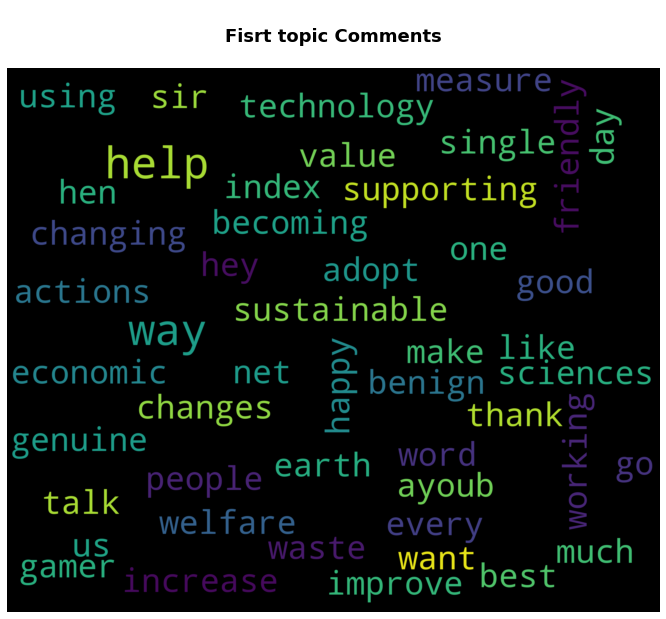

In [82]:
wordcloud = WordCloud(max_font_size=200, max_words=350, background_color="black",
                      width= 3000, height = 2500,
                      stopwords = stopwords.words('english')).generate(" ".join(first_topic2_words))

plot_wordcloud(wordcloud, '\nFisrt topic')

(-0.5, 1279.5, 1262.5, -0.5)

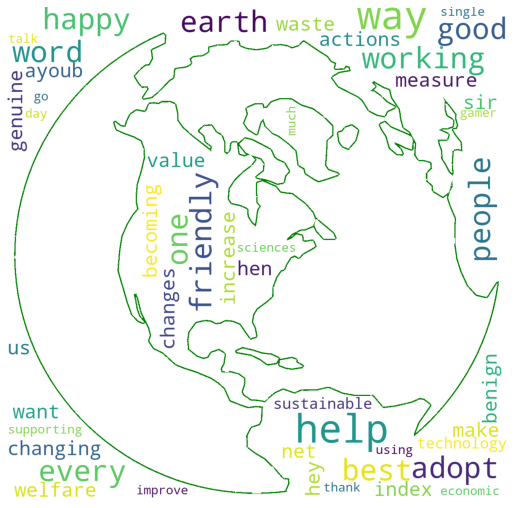

In [84]:
plt.figure(figsize=(20,20))
# The wordcloud of the raven for Edgar Allen Poe
plt.subplot(211)
wc3 = WordCloud(background_color="white", 
               max_words=350, 
               mask=first_, 
               stopwords=STOPWORDS, collocations= False, 
               max_font_size= 100, contour_width=1, contour_color='green')

wc3.generate(" ".join(first_topic2_words))
plt.imshow(wc3.recolor( colormap= 'viridis' , random_state=17))
plt.axis('off')

In [85]:
wc3.to_file('wc3.png')

(-0.5, 1279.5, 1262.5, -0.5)

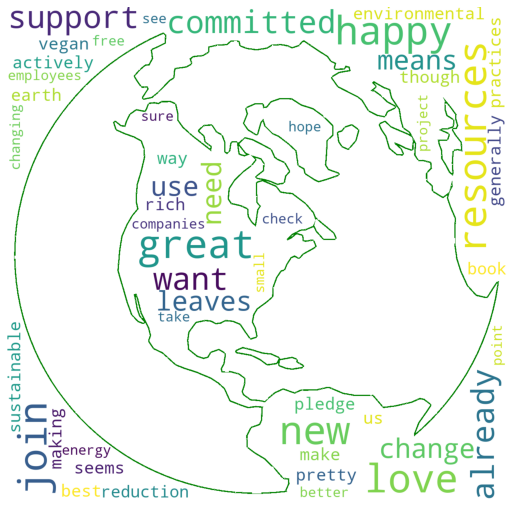

In [87]:
plt.figure(figsize=(20,20))
# The wordcloud of the raven for Edgar Allen Poe
plt.subplot(211)
wc4 = WordCloud(background_color="white", 
               max_words=350, 
               mask=first_, 
               stopwords=STOPWORDS, collocations= False, 
               max_font_size= 100, contour_width=1, contour_color='green')

wc4.generate(" ".join(second_topic2_words))
plt.imshow(wc4.recolor( colormap= 'viridis' , random_state=17))
plt.axis('off')

In [88]:
wc4.to_file('wc4.png')

(-0.5, 1279.5, 1262.5, -0.5)

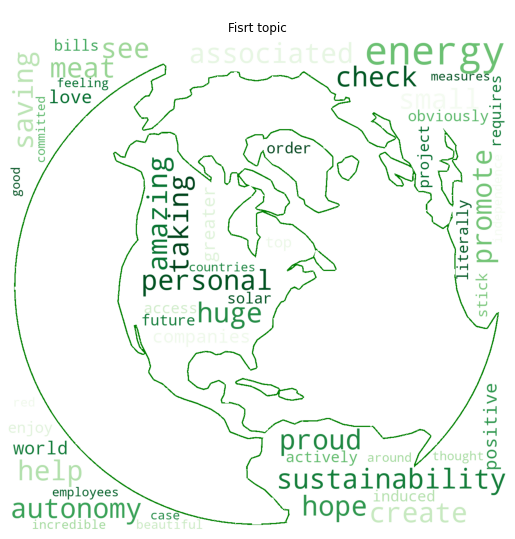

In [60]:
plt.figure(figsize=(20,20))
# The wordcloud of the raven for Edgar Allen Poe
plt.subplot(211)
wc = WordCloud(background_color="white", 
               max_words=350, 
               mask=first_, 
               stopwords=STOPWORDS, collocations= False, 
               max_font_size= 100, contour_width=1, contour_color='green')

wc.generate(" ".join(third_topic2_words))
plt.title(' \nFisrt topic')
plt.imshow(wc.recolor( colormap= 'Greens' , random_state=17))
plt.axis('off')